In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from tabulate import tabulate

In [49]:
def plotting_function(xs, ys, popt, pcov, xlabel='', ylabel='', plot_shape='bo', round_to=4):
    text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
    text += f"    m = {format(popt[0], '.4g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05 # amount of free space to be shown before the least point and after the maximum
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), 'r')

    # error lines 
    # plt.plot(xFit, func(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--") # "b--" means blue dashed lines                          ^                            ^
    # plt.plot(xFit, func(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)


In [4]:
def straight_line(x, m, c): return m*x + c

In [17]:
Cref = .22e-6
d = 2e-3
A = np.pi*np.power(0.13, 2)
epsilon_o = 8.854187817e-12

# Air

## Method 1

If the Equation is y = mx + c
For the best fit curve:
    m = 2.485e-07 ± 9.786e-09
    c = 2.986e-09 ± 2.471e-08

The curve looks like:


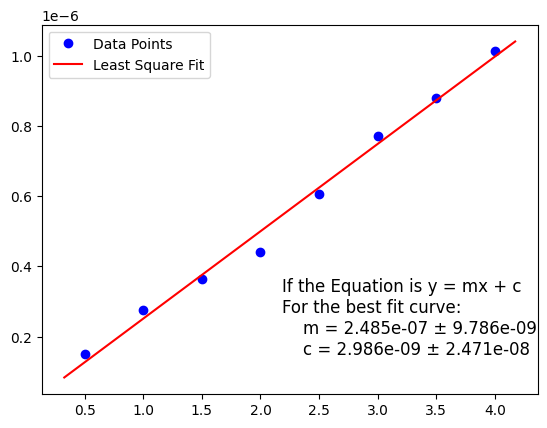

In [50]:
uc = np.arange(0.5, 4.1, 0.5)
vo = np.array([0.68, 1.26, 1.65, 2, 2.75, 3.50, 4, 4.6])
q = Cref*vo

method_1 = curve_fit(straight_line, uc, q)
plotting_function(uc, q, method_1[0], method_1[1])

In [18]:
e_air_1 = (d*method_1[0][0]*0.001)/(epsilon_o*A)
e_air_1

1.0572136760992754

## Method 2

If the Equation is y = mx + c
For the best fit curve:
    m = 7.616e-07 ± 0.0
    c = 9.134e-08 ± 0.0

The curve looks like:


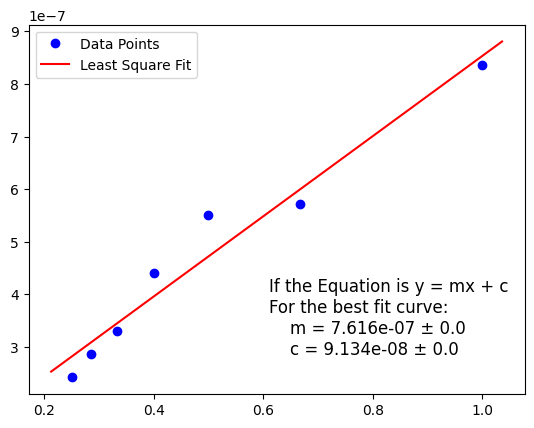

In [42]:
ds_inv = 1/np.arange(1, 4.1, 0.5)
vo_ = np.array([3.8, 2.6, 2.5, 2, 1.5, 1.3, 1.1])
q_ = Cref*vo_

method_2 = curve_fit(straight_line, ds_inv, q_)
plotting_function(ds_inv, q_, method_2[0], method_2[1])

In [43]:
uc_2 = 1500
e_air_2 = (method_2[0][0]*0.001)/(epsilon_o*A*uc_2)
e_air_2

1.0800687068621586

In [44]:
e_air = (e_air_1+e_air_2)/2
e_air

1.068641191480717

## Error analysis

In [51]:
del_slope_1, del_slope_2 = method_1[1][0][0]**0.5, method_2[1][0][0]**0.5

# e1 = d*slope
del_e_1 = np.sqrt((0.1/2)**2 + (del_slope_1/method_1[0][0])**2)

# e2 = slope/uc
del_e_2 = np.sqrt((100/uc_2)**2 + (del_slope_2/method_2[0][0])**2)

del_e = 0.5*np.sqrt((del_e_1)**2 + (del_e_2)**2)
del_e

0.06660351825920066

# Wood

If the Equation is y = mx + c
For the best fit curve:
    m = 1.812e-07 ± 0.0
    c = 2.577e-07 ± 0.0

The curve looks like:


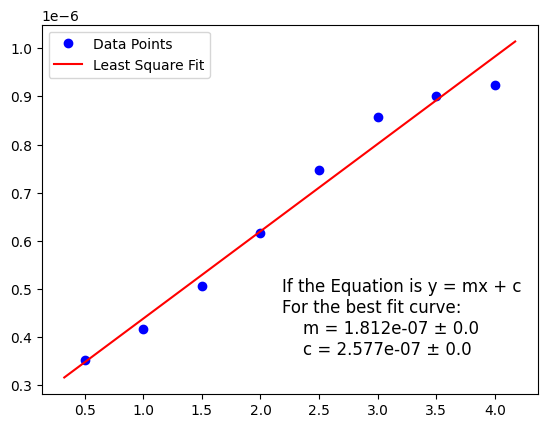

In [31]:
vo_wood = np.array([1.6, 1.9, 2.3, 2.8, 3.4, 3.9, 4.1, 4.2])
q_wood = Cref*vo_wood

curve_wood = curve_fit(straight_line, uc, q_wood)
plotting_function(uc, q_wood, curve_wood[0], curve_wood[1])

In [38]:
d_wood = 0.0082
e_wood = (d_wood*curve_wood[0][0]*0.001)/(epsilon_o*A)

e_wood

3.1613896959768635

In [39]:
del_e_wood = e_wood*np.sqrt((0.0001/d_wood)**2 + (curve_wood[1][0][0]/curve_wood[0][0])**2)
del_e_wood

0.03855353287776671

# Styrofoam

If the Equation is y = mx + c
For the best fit curve:
    m = 1.812e-07 ± 0.0
    c = 2.577e-07 ± 0.0

The curve looks like:


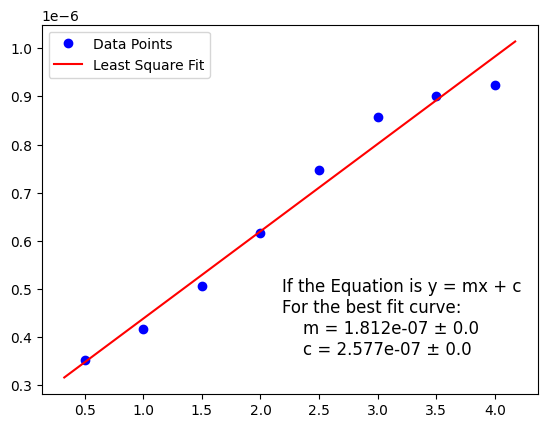

In [34]:
vo_sty = np.array([1.1, 2.4, 3.9, 5.1, 6.3, 7.5, 9, 10])*0.1
q_sty = Cref*vo_wood

curve_sty = curve_fit(straight_line, uc, q_sty)
plotting_function(uc, q_sty, curve_sty[0], curve_sty[1])

In [37]:
d_sty = 0.0192
e_sty = (d_sty*curve_sty[0][0]*0.001)/(epsilon_o*A)

e_sty

7.40227831253119

In [36]:
del_e_sty = e_sty*np.sqrt((0.0001/d_sty)**2 + (curve_sty[1][0][0]/curve_sty[0][0])**2)
del_e_sty

0.38553532877767077